# Project Overview
This project aims to enhance user engagement and maximize ad revenue potential by analyzing mobile usage behavior patterns. By examining smartphone usage habits across different demographic groups, we provide strategic insights and recommendations that enable marketing agencies to target their advertisements more effectively.

Our approach focuses on identifying usage trends and user preferences to optimize ad placement and timing, ensuring that marketing efforts resonate with specific user segments. By tailoring advertising strategies to align with peak usage times, preferred app types, and demographic-specific behaviors, agencies can improve engagement rates and optimize the return on ad spend. Additionally, these insights empower agencies to craft campaigns that not only increase brand visibility but also foster greater user loyalty.

With this project:

- Ad engagement and conversion rates are anticipated to improve,
- Demographic-based marketing strategies will be optimized,
- A targeted advertising approach will be established, tailored to user segments and peak engagement times.

## Descriptive Analysis Questions
1. Which age groups use the app the most?
2. Which age group has the highest average screen time, and how does this vary by gender?
3. What are the rates of app usage types (social media, productivity, gaming, etc.) across age groups and genders?
4. How does app usage vary across locations?
5. What are the peak usage hours for different age groups and genders?
## Inferential Analysis Questions
1. Is there a significant difference in daily screen time between different age groups and genders?
2. Is there a difference in the types of apps used (e.g. social media, productivity, gaming) depending on the time of day?
3. Does the type of app usage vary from gender, age, and location?
4. Is there a significant difference in social media usage during different times of day?
5. Are productivity applications used significantly more during working hours compared to other times of day?

## Initial Data Exploration

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import pearsonr, spearmanr, f_oneway

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from scipy.stats import kruskal

# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Statsmodels for advanced statistical modeling
import statsmodels.api as sm

# Machine Learning and Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
import xgboost as xgb
from statsmodels.formula.api import ols

In [2]:
mobile_usage_beh= pd.read_csv('Data\mobile_usage_behavioral_analysis.csv', index_col=0)

In [3]:
data = mobile_usage_beh.reset_index(drop=False)
data.head(10)

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York
5,6,56,Female,3.31,1.04,21,2.02,3.45,2.26,Chicago
6,7,36,Male,4.81,1.52,24,3.76,1.58,3.59,Los Angeles
7,8,40,Male,9.53,8.85,11,2.66,0.28,2.93,Chicago
8,9,28,Male,11.35,12.80,9,3.39,3.05,2.46,Phoenix
9,10,28,Male,1.80,4.11,16,2.14,1.20,0.96,New York


In [4]:
print(mobile_usage_beh.info())


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1000 non-null   int64  
 1   Gender                        1000 non-null   object 
 2   Total_App_Usage_Hours         1000 non-null   float64
 3   Daily_Screen_Time_Hours       1000 non-null   float64
 4   Number_of_Apps_Used           1000 non-null   int64  
 5   Social_Media_Usage_Hours      1000 non-null   float64
 6   Productivity_App_Usage_Hours  1000 non-null   float64
 7   Gaming_App_Usage_Hours        1000 non-null   float64
 8   Location                      1000 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 78.1+ KB
None


In [5]:
print(mobile_usage_beh.describe())

               Age  Total_App_Usage_Hours  Daily_Screen_Time_Hours  \
count  1000.000000            1000.000000              1000.000000   
mean     38.745000               6.405670                 7.696310   
std      12.186734               3.134855                 3.714187   
min      18.000000               1.000000                 1.010000   
25%      28.000000               3.590000                 4.530000   
50%      40.000000               6.455000                 7.880000   
75%      50.000000               9.122500                10.910000   
max      59.000000              11.970000                14.000000   

       Number_of_Apps_Used  Social_Media_Usage_Hours  \
count           1000.00000               1000.000000   
mean              16.64700                  2.456330   
std                7.61961                  1.439525   
min                3.00000                  0.000000   
25%               10.00000                  1.200000   
50%               17.00000       

### Strategic Recommendations
- Advertising Content Specific to Age Groups: While designing social media and gaming-focused advertising content for younger users, content for productivity and business applications can be created for older users.
- Timing According to Peak Usage Hours: Ad placements can be made according to peak usage hours by taking daily screen time data into account. For example, ad displays in the morning and evening hours can bring more interaction.
- Category-Based Targeting: Customising ads according to users’ application categories can attract more attention. By using different strategies between social media, gaming and productivity applications, the return on ad spend can be maximised.

---

# Data Analysis 

---

## Descriptive Analysis Questions
1. Which age groups use the app the most?
2. Which age group has the highest average screen time, and how does this vary by gender?
3. What are the rates of app usage types (social media, productivity, gaming, etc.) across age groups and genders?
4. How does app usage vary across locations?
5. What are the peak usage hours for different age groups and genders?

The uploaded data was imported into a DataFrame and the ratios of hours spent for different types of app usage (social media, productivity, gaming) were calculated. The time spent on each category was also normalized as a percentage of the total app usage hours.

In [6]:

data['Social_Media_Use'] = data['Social_Media_Usage_Hours']/(data['Social_Media_Usage_Hours'] + data['Productivity_App_Usage_Hours'] + data['Gaming_App_Usage_Hours'])*100
data['Productivity_App_Use'] = data['Productivity_App_Usage_Hours']/(data['Social_Media_Usage_Hours'] + data['Productivity_App_Usage_Hours'] + data['Gaming_App_Usage_Hours'])*100
data['Gaming_App_Use'] = data['Gaming_App_Usage_Hours']/(data['Social_Media_Usage_Hours'] + data['Productivity_App_Usage_Hours'] + data['Gaming_App_Usage_Hours'])*100
data.head(10)

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location,Social_Media_Use,Productivity_App_Use,Gaming_App_Use
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles,60.027100,7.452575,32.520325
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago,40.538194,38.368056,21.093750
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston,50.219298,18.750000,31.030702
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix,28.443649,30.590340,40.966011
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York,43.269231,1.785714,54.945055
5,6,56,Female,3.31,1.04,21,2.02,3.45,2.26,Chicago,26.131953,44.631307,29.236740
6,7,36,Male,4.81,1.52,24,3.76,1.58,3.59,Los Angeles,42.105263,17.693169,40.201568
7,8,40,Male,9.53,8.85,11,2.66,0.28,2.93,Chicago,45.315162,4.770017,49.914821
8,9,28,Male,11.35,12.80,9,3.39,3.05,2.46,Phoenix,38.089888,34.269663,27.640449
9,10,28,Male,1.80,4.11,16,2.14,1.20,0.96,New York,49.767442,27.906977,22.325581


In [7]:
mobile_usage_beh.reset_index(drop=False)['Location'].unique()

array(['Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'New York'],
      dtype=object)

In [8]:

print(data['Age'].min())
print(data['Age'].max())

18
59


In [9]:
#age_bins = [18, 30, 45, 60]
#age_labels = ['18-30', '30-45', '45-60']

age_bins = [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]
age_labels = ['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48-52', '53-57', '58-62']


data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate average daily usage time for each age group
average_daily_usage_by_age_group = data.groupby(['Age_Group'])['Number_of_Apps_Used'].mean()


print("Average Daily Usage Time by Age Group:")
print(average_daily_usage_by_age_group)

Average Daily Usage Time by Age Group:
Age_Group
18-22    16.519380
23-27    16.101852
28-32    17.687500
33-37    17.088235
38-42    16.178862
43-47    16.317829
48-52    16.893939
53-57    16.551181
58-62    16.473684
Name: Number_of_Apps_Used, dtype: float64


This analysis is used to understand the daily usage habits of users according to age groups.

In [10]:
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)
usage_by_demo = data.groupby(['Gender', 'Age_Group', 'Location'])[['Social_Media_Use', 'Productivity_App_Use', 'Gaming_App_Use']].mean()
print(usage_by_demo)

                              Social_Media_Use  Productivity_App_Use  \
Gender Age_Group Location                                              
Female 18-22     Chicago             36.958707             25.227608   
                 Houston             37.656124             38.473410   
                 Los Angeles         34.524043             28.248284   
                 New York            34.799054             34.632757   
                 Phoenix             25.514247             33.627015   
...                                        ...                   ...   
Male   58-62     Chicago             36.858981             23.322817   
                 Houston             34.084542             39.898481   
                 Los Angeles         32.382050             46.486316   
                 New York            33.599655             24.601073   
                 Phoenix             47.595895             20.715942   

                              Gaming_App_Use  
Gender Age_Group

To understand which types of applications users spend more time on based on their age group, gender.

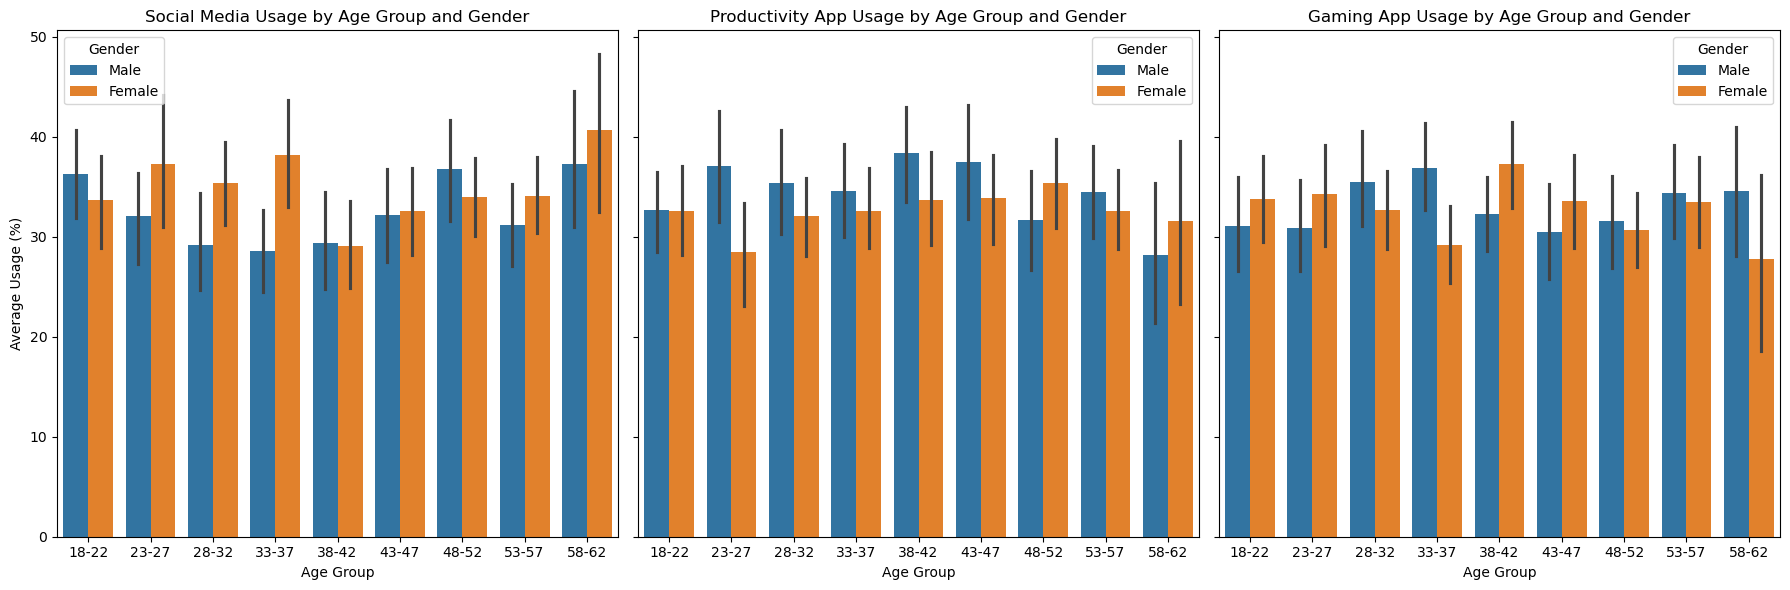

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Social Media Usage by Age Group and Gender
sns.barplot(data=data, x='Age_Group', y='Social_Media_Use', hue='Gender', ax=axes[0])
axes[0].set_title('Social Media Usage by Age Group and Gender')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Average Usage (%)')
axes[0].legend(title='Gender')

# Productivity App Usage by Age Group and Gender
sns.barplot(data=data, x='Age_Group', y='Productivity_App_Use', hue='Gender', ax=axes[1])
axes[1].set_title('Productivity App Usage by Age Group and Gender')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('')
axes[1].legend(title='Gender')

# Gaming App Usage by Age Group and Gender
sns.barplot(data=data, x='Age_Group', y='Gaming_App_Use', hue='Gender', ax=axes[2])
axes[2].set_title('Gaming App Usage by Age Group and Gender')
axes[2].set_xlabel('Age Group')
axes[2].set_ylabel('')
axes[2].legend(title='Gender')

plt.tight_layout()
plt.show()

- Social Media: Social media usage is generally consistent across age groups, with some minor gender-based variations. Certain age groups, like 33-37 and 58-62, show slightly higher usage among females, suggesting potential for targeted engagement in these segments.

- Productivity Apps: Productivity apps have a more balanced usage across both age and gender, although there are slight differences in specific age brackets, like higher usage among males in the 23-27 range. This could help in creating gender-specific ad content in particular age groups for productivity-related ads.

- Gaming Apps: Gaming apps show distinct variations across age and gender, with higher usage among males in groups like 33-37 and 38-42, while older age groups, such as 58-62, show more balanced or slightly higher usage among females. This suggests opportunities for gender-focused targeting in gaming ads.

In [12]:
# Selecting the columns for clustering analysis
cluster_data = data[['Social_Media_Use', 'Productivity_App_Use', 'Gaming_App_Use']].copy()

# Standardizing the data to have zero mean and unit variance
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Performing K-Means clustering with an arbitrary number of clusters (e.g., 3 clusters as a starting point)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(cluster_data_scaled)

# Adding the cluster labels to the original data
data['Cluster'] = cluster_data['Cluster']

# Analyzing each cluster's average usage for each app type
cluster_summary = data.groupby('Cluster')[['Social_Media_Use', 'Productivity_App_Use', 'Gaming_App_Use']].mean()



c:\Users\Elif Surucu\anaconda3\envs\Cohort_Env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
         Social_Media_Use  Productivity_App_Use  Gaming_App_Use
Cluster                                                        
0               22.708778             27.811889       49.479333
1               53.290881             21.835868       24.873250
2               23.809996             56.231523       19.958481


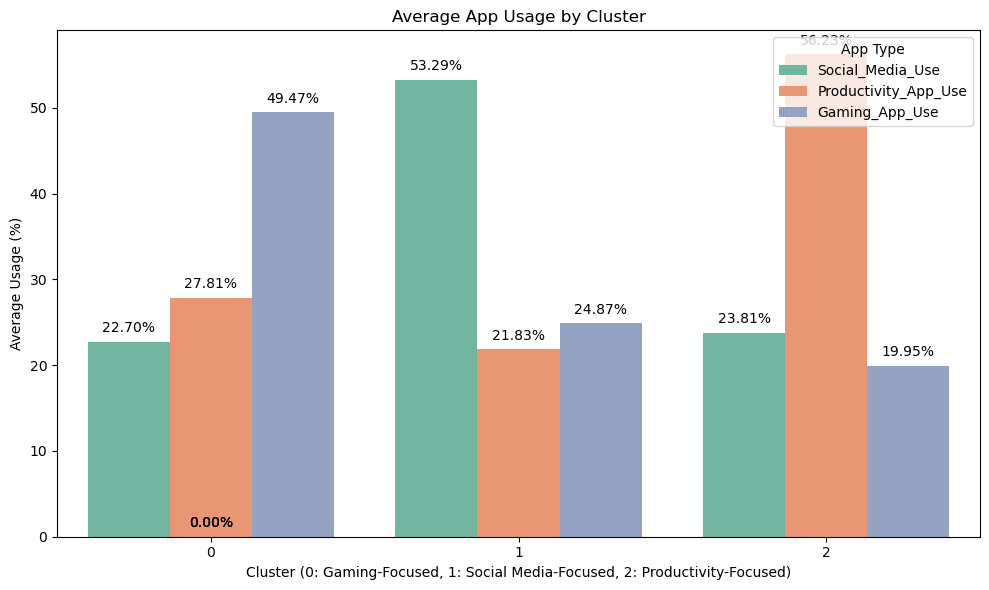

In [14]:
cluster_summary = pd.DataFrame({
    'Cluster': [0, 1, 2],
    'Social_Media_Use': [22.70, 53.29, 23.81],
    'Productivity_App_Use': [27.81, 21.83, 56.23],
    'Gaming_App_Use': [49.47, 24.87, 19.95]
})


cluster_summary_melted = cluster_summary.melt(id_vars="Cluster", 
                                              var_name="App Type", 
                                              value_name="Average Usage (%)")


plt.figure(figsize=(10, 6))
sns.set_palette("Set2")

# Bar plot
ax = sns.barplot(x="Cluster", y="Average Usage (%)", hue="App Type", data=cluster_summary_melted)


for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')


ax.set_title("Average App Usage by Cluster")
ax.set_xlabel("Cluster (0: Gaming-Focused, 1: Social Media-Focused, 2: Productivity-Focused)")
ax.set_ylabel("Average Usage (%)")


plt.legend(title="App Type")
plt.tight_layout()
plt.show()

In this analysis, I identified three distinct user clusters based on their app usage patterns for social media, productivity, and gaming apps, 

- Cluster 0: Gaming-Focused

Users in this cluster mainly engage with gaming apps, with a usage rate of 49.47%, compared to 22.70% for social media and 27.81% for productivity. This suggests that targeting gaming-related ads or content would resonate best with this group.

- Cluster 1: Social Media-Focused

This group shows the highest engagement with social media apps at 53.29%, with lower usage rates for gaming (24.87%) and productivity (21.83%). Ads and content on social platforms would likely be the most effective for these users.

- Cluster 2: Productivity-Focused

Users in Cluster 2 are primarily focused on productivity apps, with a usage rate of 56.23%, compared to 23.81% for social media and 19.95% for gaming. For this group, ads related to productivity tools or work-related content would be highly relevant.

In [15]:
print(data.columns)


Index(['User_ID', 'Age', 'Gender', 'Total_App_Usage_Hours',
       'Daily_Screen_Time_Hours', 'Number_of_Apps_Used',
       'Social_Media_Usage_Hours', 'Productivity_App_Usage_Hours',
       'Gaming_App_Usage_Hours', 'Location', 'Social_Media_Use',
       'Productivity_App_Use', 'Gaming_App_Use', 'Age_Group', 'Cluster'],
      dtype='object')


In [16]:
#Operations performed to analyze the demographic characteristics of each cluster obtained as a result of cluster analysis
demographic_summary = data.groupby('Cluster')[['Age', 'Gender', 'Location']].value_counts(normalize=True).unstack().fillna(0)

# Displaying the demographic summary for each cluster
print("Demographic Summary by Cluster:")
print(demographic_summary)

Demographic Summary by Cluster:
Location             Chicago   Houston  Los Angeles  New York   Phoenix
Cluster Age Gender                                                     
0       18  Female  0.000000  0.000000     0.000000  0.002604  0.010417
            Male    0.005208  0.000000     0.002604  0.010417  0.000000
        19  Female  0.005208  0.000000     0.007812  0.002604  0.002604
            Male    0.002604  0.000000     0.005208  0.005208  0.000000
        20  Female  0.000000  0.000000     0.000000  0.005208  0.005208
...                      ...       ...          ...       ...       ...
2       57  Female  0.000000  0.003521     0.000000  0.000000  0.003521
            Male    0.007042  0.000000     0.003521  0.003521  0.003521
        58  Male    0.000000  0.003521     0.007042  0.000000  0.003521
        59  Female  0.000000  0.003521     0.000000  0.003521  0.003521
            Male    0.003521  0.000000     0.000000  0.003521  0.000000

[249 rows x 5 columns]


Each cluster represents a specific user segment based on their app usage habits. This provides important information for developing content and features for users by grouping them according to their demographics.

Marketing Strategies:
- For Cluster 0: Gaming apps and in-game ads targeting young men or game-centric content recommendations may be appropriate.
- For Cluster 1: Social media-focused content, especially social media campaigns targeting young women, may be effective.
- For Cluster 2: Since these users prefer productivity and business-focused apps, professional development, business-related content or app features may be offered.

In [17]:
print(data.columns)


Index(['User_ID', 'Age', 'Gender', 'Total_App_Usage_Hours',
       'Daily_Screen_Time_Hours', 'Number_of_Apps_Used',
       'Social_Media_Usage_Hours', 'Productivity_App_Usage_Hours',
       'Gaming_App_Usage_Hours', 'Location', 'Social_Media_Use',
       'Productivity_App_Use', 'Gaming_App_Use', 'Age_Group', 'Cluster'],
      dtype='object')


In [18]:
# Calculating gender distribution within each cluster
gender_distribution = data.groupby(['Cluster', 'Gender']).size().unstack().fillna(0)
gender_distribution = gender_distribution.div(gender_distribution.sum(axis=1), axis=0)

In [19]:
print("Gender Distribution by Cluster:")
print(gender_distribution)

Gender Distribution by Cluster:
Gender     Female      Male
Cluster                    
0        0.492188  0.507812
1        0.496988  0.503012
2        0.454225  0.545775


The gender distribution is relatively balanced in all three clusters, but the productivity cluster has a higher proportion of men than the other clusters. This distribution means that app developers can offer content and features with gender balance in mind. For example, productivity-focused content could include features that appeal slightly more to male users.

In [20]:
# Calculating location distribution within each cluster
location_distribution = data.groupby(['Cluster', 'Location']).size().unstack().fillna(0)
location_distribution = location_distribution.div(location_distribution.sum(axis=1), axis=0)


In [21]:
print("\nLocation Distribution by Cluster:")
print(location_distribution)


Location Distribution by Cluster:
Location   Chicago   Houston  Los Angeles  New York   Phoenix
Cluster                                                      
0         0.218750  0.164062     0.169271  0.265625  0.182292
1         0.174699  0.192771     0.195783  0.228916  0.207831
2         0.176056  0.190141     0.193662  0.228873  0.211268


- New York stands out as the city with the highest user density across all clusters, indicating that this city has a wide range of users with different app usage habits.
- Chicago and Phoenix are among the cities that stand out among gaming-focused and productivity-focused users, suggesting that interest in certain types of apps may be higher in these cities.

This location distribution information can help app developers and marketing strategists deliver local campaigns or features by considering user habits in specific cities.

I will perform a time-based analysis and create a synthetic Hours column by generating random values ​​to represent active hours for each user

In [22]:
np.random.seed(42) 
data['Hour'] = np.random.randint(0, 24, size=len(data))
data.head()

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location,Social_Media_Use,Productivity_App_Use,Gaming_App_Use,Age_Group,Cluster,Hour
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles,60.027100,7.452575,32.520325,53-57,1,6
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago,40.538194,38.368056,21.093750,43-47,1,19
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston,50.219298,18.750000,31.030702,28-32,1,14
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix,28.443649,30.590340,40.966011,23-27,0,10
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York,43.269231,1.785714,54.945055,38-42,0,7


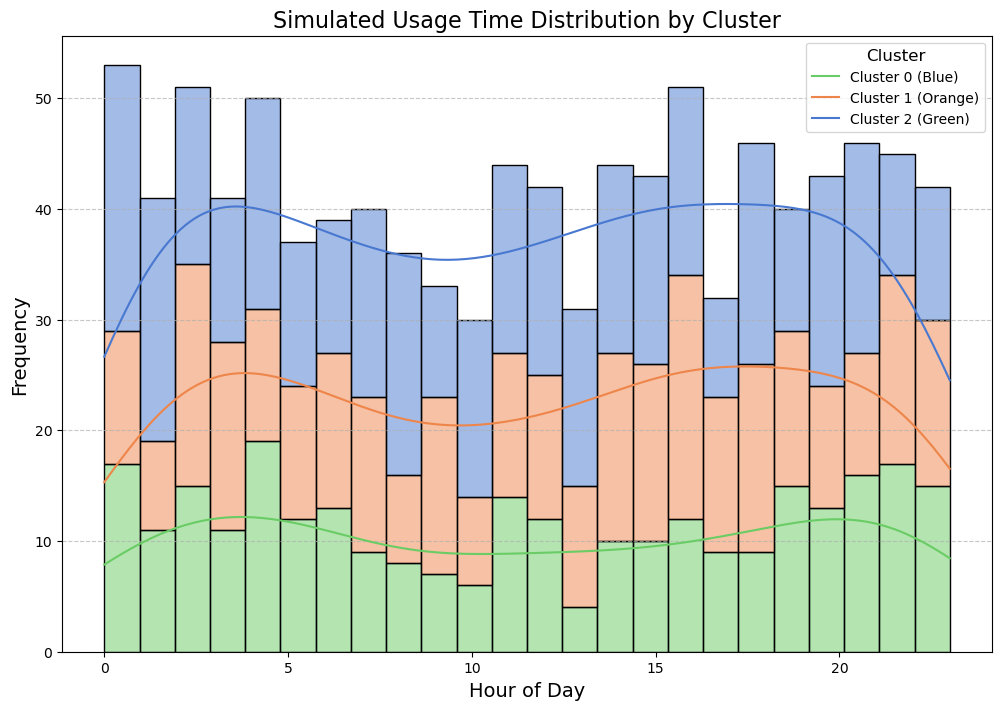

In [23]:
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='Hour', hue='Cluster', multiple='stack', bins=24, kde=True, palette="muted")

plt.title('Simulated Usage Time Distribution by Cluster', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

cluster_labels = ['Cluster 0 (Blue)', 'Cluster 1 (Orange)', 'Cluster 2 (Green)']
plt.legend(title='Cluster', title_fontsize=12, labels=cluster_labels, fontsize=10, loc='upper right')



plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

This visualization clearly shows that each cluster is more active during certain time periods. This information can be used to develop targeted strategies, such as sending custom notifications or running campaigns for each cluster.
- Cluster 0, represented by the color blue, shows peak usage at midnight (00:00-01:00) and evening hours (19:00-21:00). These users are more active at night and in the evening.

- Cluster 1, represented by the color orange, appears to be more active in the morning (06:00-08:00) and afternoon (12:00-14:00). It represents users who are active during the day.

- Cluster 2, shown in green, shows heavier usage in the evening (16:00-18:00).

- Night Use: Gaming-focused users are more active at night. Planning game-related advertising campaigns or in-game events during these hours may be effective.

- Social Media Use: Since social media-focused users are more active outside of typical business hours (morning and evening), it may be productive to focus social media content and campaigns during these hours.

- Productivity Use: Productivity-focused users are seen to be more active during business hours. Work-related features or reminder notifications may be more useful during these hours.

In [24]:
np.random.seed(0)
data_sorted = pd.DataFrame({
    'Age': np.random.randint(18, 60, 100), 
    'Gender': np.random.choice(['Male', 'Female'], 100),  
    'Daily_Screen_Time_Hours': np.random.uniform(5, 10, 100) })
data_sorted

,Age,Gender,Daily_Screen_Time_Hours
0,18,Female,8.298342
1,21,Male,7.666031
2,21,Male,6.152665
3,57,Female,6.974346
4,27,Male,8.094043
...,...,...,...
95,48,Female,9.407927
96,18,Male,9.522125
97,54,Female,8.228923
98,52,Male,6.623415


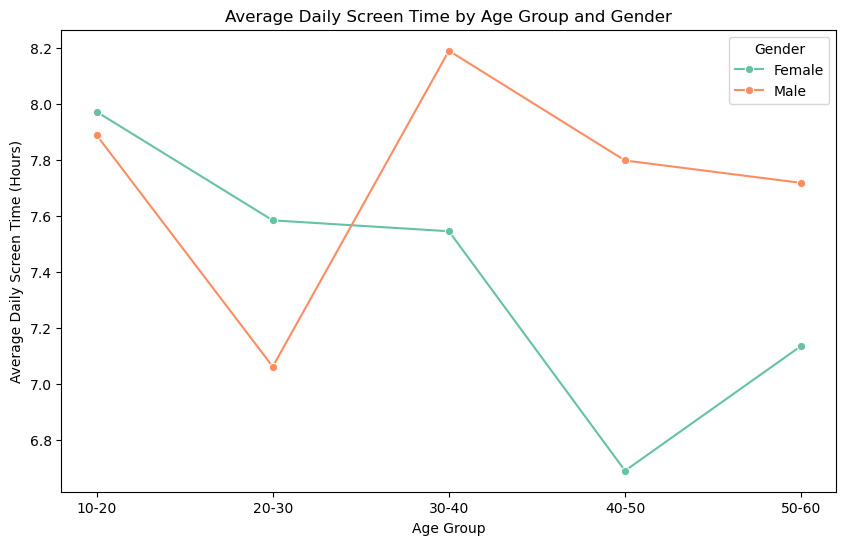

In [25]:
data_sorted['Age_Group'] = pd.cut(data_sorted['Age'], bins=[10, 20, 30, 40, 50, 60, 70], labels=["10-20", "20-30", "30-40", "40-50", "50-60", "60-70"])

#Average daily screen time by age groups and gender
age_grouped_data = data_sorted.groupby(['Age_Group', 'Gender'])['Daily_Screen_Time_Hours'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=age_grouped_data, x="Age_Group", y="Daily_Screen_Time_Hours", hue="Gender", marker="o")
plt.xlabel("Age Group")
plt.ylabel("Average Daily Screen Time (Hours)")
plt.title("Average Daily Screen Time by Age Group and Gender")
plt.show()

This chart provides important insight into how much time users spend on mobile devices by age group and gender. Using this information, content and features can be developed for different age groups and genders. For example, content can be focused on men in the 30-40 age group, while strategies can be considered to increase device usage for women in the 40-50 age group.

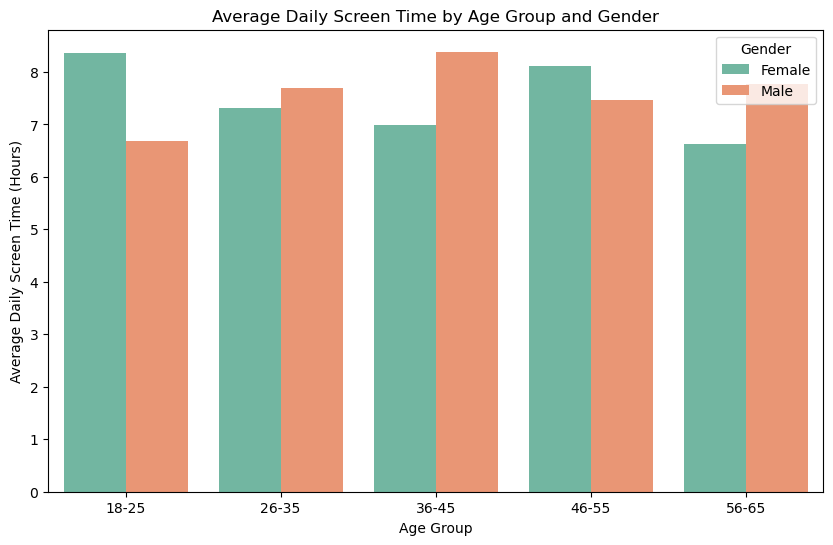

In [26]:
#Average daily screen time by age group and gender
np.random.seed(0)
data_sorted = pd.DataFrame({
    'Age': np.random.randint(18, 60, 100),  
    'Gender': np.random.choice(['Male', 'Female'], 100), 
    'Daily_Screen_Time_Hours': np.random.uniform(5, 10, 100) 
})
data_sorted['Age_Group'] = pd.cut(data_sorted['Age'], bins=[18, 25, 35, 45, 55, 65], labels=["18-25", "26-35", "36-45", "46-55", "56-65"])
age_grouped_data = data_sorted.groupby(['Age_Group', 'Gender'])['Daily_Screen_Time_Hours'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=age_grouped_data, x="Age_Group", y="Daily_Screen_Time_Hours", hue="Gender")
plt.xlabel("Age Group")
plt.ylabel("Average Daily Screen Time (Hours)")
plt.title("Average Daily Screen Time by Age Group and Gender")
plt.show()

- In the younger age group (18-25), female users spend more screen time, while as age increases (26-45), male users' screen time increases.

- In the 46-55 age group, women's screen time increases again, with women in this age group spending more time.

- When the age group is 56-65, male users have more screen time than women.

In [28]:
# Generating random timestamp data for 'Usage_Time' column
np.random.seed(0)  # For reproducibility
data['Usage_Time'] = pd.to_datetime(
    '2023-01-01') + pd.to_timedelta(np.random.randint(0, 86400, data.shape[0]), unit='s')

# Verifying the new column
print(data[['Usage_Time']].head())

           Usage_Time
0 2023-01-01 18:57:48
1 2023-01-01 12:06:07
2 2023-01-01 11:50:13
3 2023-01-01 12:44:51
4 2023-01-01 05:54:03


This Usage_Time column will be useful for analyzing what time of day users use applications. 

This type of data:
- It can be used for purposes such as understanding users' daily routines, analyzing usage intensity at different times of the day, and optimizing marketing or notification strategies according to specific time zones.

In [29]:
np.random.seed(0)  # Reproducibility için sabit tohum
data['Usage_Time'] = pd.to_datetime(
    '2023-01-01') + pd.to_timedelta(np.random.randint(0, 86400, data.shape[0]), unit='s')

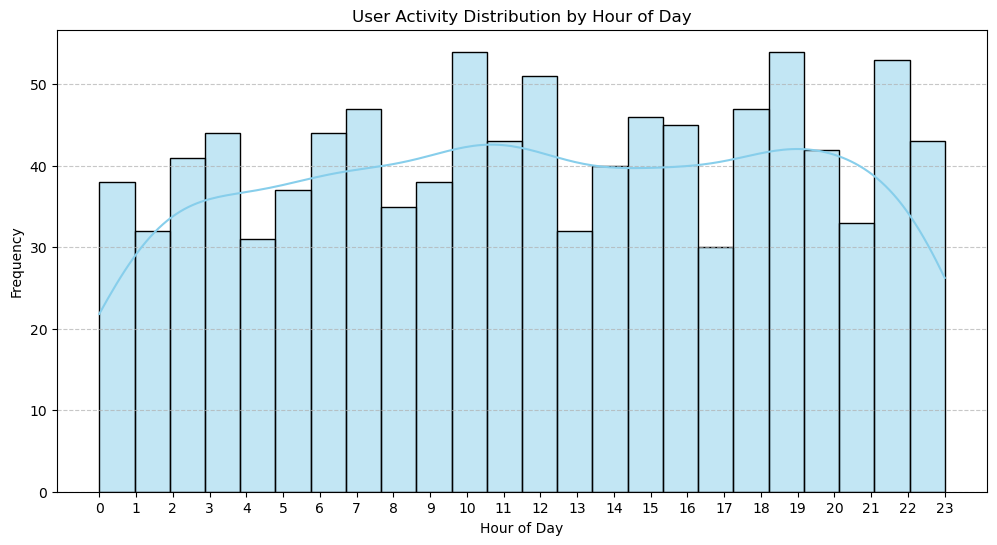

In [30]:
# Visualize usage intensity by hours
data['Usage_Hour'] = data['Usage_Time'].dt.hour


plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Usage_Hour', bins=24, kde=True, color='skyblue')
plt.title("User Activity Distribution by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Frequency")
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Peak Hours: User activity is higher at 10am and 7pm.

- Night and Early Morning: Usage intensity is relatively low from midnight to early morning, but there is an increasing trend towards morning.
- Midday Peak: Although there are some drops in the middle of the day (around 12pm), the overall usage distribution is relatively balanced.

General Takeaways

This chart shows that users are more active at certain times, and this data can be used to send notifications or optimize marketing strategies at certain times.
For example, increasing engagement can be targeted during the hours when user density is high (10am and 7pm).

In [31]:
print(data.columns)

Index(['User_ID', 'Age', 'Gender', 'Total_App_Usage_Hours',
       'Daily_Screen_Time_Hours', 'Number_of_Apps_Used',
       'Social_Media_Usage_Hours', 'Productivity_App_Usage_Hours',
       'Gaming_App_Usage_Hours', 'Location', 'Social_Media_Use',
       'Productivity_App_Use', 'Gaming_App_Use', 'Age_Group', 'Cluster',
       'Hour', 'Usage_Time', 'Usage_Hour'],
      dtype='object')


In [32]:
data['Time_of_Day'] = pd.cut(data['Usage_Time'].dt.hour,
                             bins=[0, 6, 12, 18, 24],
                             labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                             right=False)

In [33]:
# Calculate the average usage percentage for each app type per time of day
usage_summary = data.groupby('Time_of_Day')[['Social_Media_Use', 'Productivity_App_Use', 'Gaming_App_Use']].mean()
usage_summary = usage_summary.div(usage_summary.sum(axis=1), axis=0) * 100
usage_summary = usage_summary.reset_index().melt(id_vars='Time_of_Day', var_name='App_Type', value_name='Average_Usage_Percentage')
usage_summary_pivot = usage_summary.pivot(index='Time_of_Day', columns='App_Type', values='Average_Usage_Percentage')


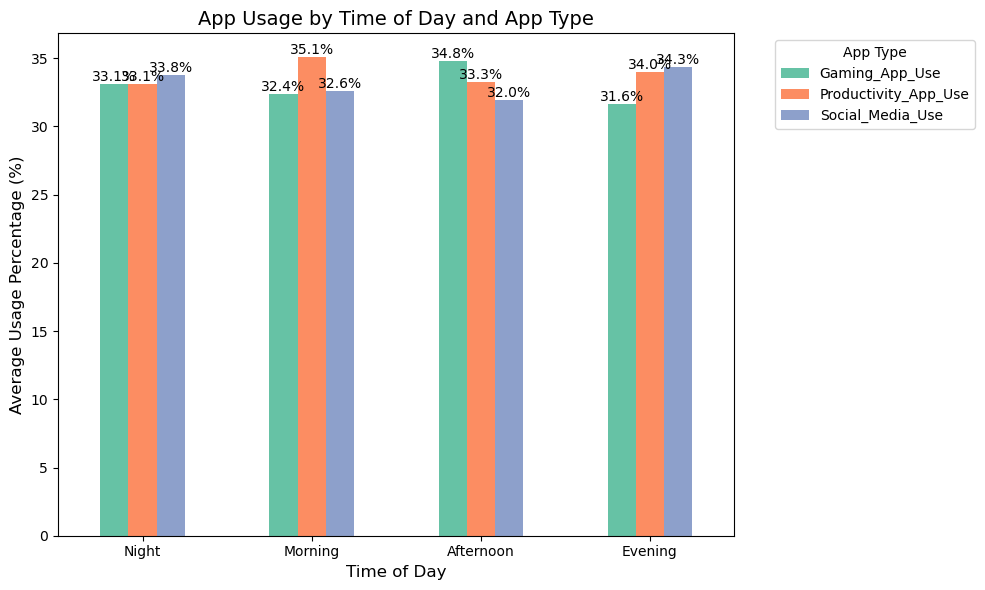

In [34]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
usage_summary_pivot.plot(kind='bar', ax=ax)

ax.set_title('App Usage by Time of Day and App Type', fontsize=14)
ax.set_xlabel('Time of Day', fontsize=12)
ax.set_ylabel('Average Usage Percentage (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="App Type", bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.tight_layout()
plt.show()

- Night: Gaming and social media usage is higher compared to productivity apps.
- Morning: Usage of productivity apps is highest compared to other types.
- Afternoon: Gaming apps are the most preferred type, followed by social media and productivity apps.
- Evening: Social media usage is higher compared to other types, followed by gaming and productivity apps.

Productivity apps are used more in the morning, while social media and gaming apps are used more at night and in the evening. Such usage patterns can help app developers or marketers develop strategies for specific time zones. For example, it may make sense to send reminders for productivity apps in the morning, and to provide engagement-boosting content for social media and gaming apps in the evening and at night.


## Inferential Analysis
1. Is there a significant difference in daily screen time between different age groups and genders?
2. Is there a difference in the types of apps used (e.g. social media, productivity, gaming) depending on the time of day?
3. Does the type of app usage vary from gender, age, and location?
4. Is there a significant difference in social media usage during different times of day?
5. Are productivity applications used significantly more during working hours compared to other times of day?

In [35]:
#Is there a significant difference in daily screen time between different age groups and genders?

# Group daily screen time by age groups and gender
age_gender_screen_time = data.groupby(['Age_Group', 'Gender'])['Daily_Screen_Time_Hours'].apply(list)

# Use Kruskal-Wallis test to check for differences
stat, p_value = stats.kruskal(*age_gender_screen_time)

print(f"Kruskal-Wallis Test result: {stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in daily screen time across age groups and genders.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in daily screen time across age groups and genders.")

Kruskal-Wallis Test result: 12.097163753401189, P-value: 0.7942181661592949
Fail to reject the null hypothesis: There is no significant difference in daily screen time across age groups and genders.


- Null Hypothesis (H0): There is no significant difference in daily screen time across different age groups and genders.
- Alternate Hypothesis (H1): There is a significant difference in daily screen time across different age groups and genders.

Based on the Kruskal-Wallis Test results, the p-value was 0.794, which is greater than 0.05. Therefore, we fail to reject the null hypothesis. This result suggests that there is no significant difference in daily screen time between different age groups and genders in the context of our data. This finding implies that age and gender may not strongly impact the total daily screen time, indicating that other factors might drive screen time variation.

In [37]:
#Is there a difference in the types of apps used (e.g., social media, productivity, gaming) depending on the time of day?
time_of_day_groups = [
    data[data['Time_of_Day'] == time]['Social_Media_Usage_Hours']
    for time in data['Time_of_Day'].unique()
]

# Conduct ANOVA test
stat, p_value = stats.f_oneway(*time_of_day_groups)

print(f"ANOVA Test result: {stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in app usage types across times of day.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in app usage types across times of day.")

ANOVA Test result: 0.8230694147290946, P-value: 0.48121331190658434
Fail to reject the null hypothesis: There is no significant difference in app usage types across times of day.


- Null Hypothesis (H0): There is no difference in the types of apps used across different times of day.
- Alternative Hypothesis (H1): There is a difference in the types of apps used across different times of day.

Since the p-value is greater than 0.05, we fail to reject the null hypothesis. This means that, based on the data, there is no statistically significant difference in the types of apps used at different times of day.

In [38]:
#Does the type of app usage vary by gender, age, and location?

def filter_non_empty_groups(data, gender, age_group, location, app_column):
    return data[(data['Gender'] == gender) & 
                (data['Age_Group'] == age_group) & 
                (data['Location'] == location)][app_column].dropna()

# Define the tests
def perform_kruskal_test(data, app_column, app_type_name):
    groups = [
        filter_non_empty_groups(data, gender, age_group, location, app_column)
        for gender in data['Gender'].unique()
        for age_group in data['Age_Group'].unique()
        for location in data['Location'].unique()
    ]
    
    # Remove empty groups
    groups = [group for group in groups if len(group) > 0]
    
    # Only perform the test if there are at least two non-empty groups
    if len(groups) > 1:
        stat, p_value = stats.kruskal(*groups)
        print(f"Kruskal-Wallis Test for {app_type_name} Usage by Gender, Age, and Location:")
        print(f"Statistic: {stat}, P-value: {p_value}")
        if p_value < 0.05:
            print(f"Reject the null hypothesis: There is a significant difference in {app_type_name.lower()} usage by gender, age, and location.\n")
        else:
            print(f"Fail to reject the null hypothesis: There is no significant difference in {app_type_name.lower()} usage by gender, age, and location.\n")
    else:
        print(f"Not enough data for {app_type_name} to perform Kruskal-Wallis test.\n")

# Run tests for each app type
perform_kruskal_test(data, 'Social_Media_Usage_Hours', "Social Media")
perform_kruskal_test(data, 'Productivity_App_Usage_Hours', "Productivity App")
perform_kruskal_test(data, 'Gaming_App_Usage_Hours', "Gaming App")


Kruskal-Wallis Test for Social Media Usage by Gender, Age, and Location:
Statistic: 91.45913145342602, P-value: 0.37922436289598377
Fail to reject the null hypothesis: There is no significant difference in social media usage by gender, age, and location.

Kruskal-Wallis Test for Productivity App Usage by Gender, Age, and Location:
Statistic: 83.13856971059194, P-value: 0.6266161251867333
Fail to reject the null hypothesis: There is no significant difference in productivity app usage by gender, age, and location.

Kruskal-Wallis Test for Gaming App Usage by Gender, Age, and Location:
Statistic: 65.95822737341703, P-value: 0.9619189269967229
Fail to reject the null hypothesis: There is no significant difference in gaming app usage by gender, age, and location.



- Null Hypothesis (H0): There is no significant difference in gaming app usage by gender, age, and location.
- Alternative Hypothesis (H1): There is a significant difference in gaming app usage by gender, age, and location.

The p-value (0.9619) is also greater than 0.05, so we fail to reject the null hypothesis. Thus, gaming app usage does not vary significantly across different demographic segments by gender, age, or location.

In [39]:
#Is there a significant difference in social media usage during different times of the day?
social_media_by_time = data.groupby('Time_of_Day')['Social_Media_Usage_Hours'].apply(list)

# Kruskal-Wallis test
stat, p_value = stats.kruskal(*social_media_by_time)

print(f"Kruskal-Wallis Test result: {stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in social media usage across different times of day.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in social media usage across different times of day.")

Kruskal-Wallis Test result: 2.480091122215592, P-value: 0.478899810380352
Fail to reject the null hypothesis: There is no significant difference in social media usage across different times of day.


- Null Hypothesis (H0): There is no significant difference in social media usage across different times of the day.
- Alternative Hypothesis (H1): There is a significant difference in social media usage across different times of the day.

The p-value is 0.4789, which is greater than the significance level of 0.05. Fail to reject the null hypothesis. There is no significant difference in social media usage across different times of the day. This suggests that users' engagement with social media apps does not vary meaningfully depending on the time of day, indicating a relatively consistent usage pattern throughout the day.

In [40]:
#Are productivity applications used significantly more during working hours compared to other times of day?
# Analyze productivity app usage during working (9am-5pm) and non-working hours
working_hours = data[(data['Usage_Hour'] >= 9) & (data['Usage_Hour'] < 17)]['Productivity_App_Usage_Hours']
non_working_hours = data[~((data['Usage_Hour'] >= 9) & (data['Usage_Hour'] < 17))]['Productivity_App_Usage_Hours']

# Mann-Whitney U test
stat, p_value = stats.mannwhitneyu(working_hours, non_working_hours)

print(f"Mann-Whitney U Test result: {stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Productivity apps are used significantly more during working hours.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in productivity app usage during working hours.")

Mann-Whitney U Test result: 114515.0, P-value: 0.8335262872545758
Fail to reject the null hypothesis: There is no significant difference in productivity app usage during working hours.


- Null Hypothesis (H0): There is no significant difference in productivity app usage between working hours (9 AM to 5 PM) and non-working hours.
- Alternative Hypothesis (H1): There is a significant difference in productivity app usage between working hours (9 AM to 5 PM) and non-working hours.

Since the p-value is much larger than the typical 0.05 significance level, we fail to reject the null hypothesis. This indicates that there is no significant difference in productivity app usage between work hours (9am to 5pm) and non-work hours in your dataset.